# NHL Data - Data Analysis Pipeline
This will be the start of our data analysis pipe line.
We will be walking through:
1. loading the data
2. Cleaing the data
3. Processing
4. Wrangling Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

## Loading in our RAW data

In [2]:
team_info = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/team_info.csv")
team_info.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


In [3]:
game_team_stats = pd.read_csv("C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv")
game_team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [4]:
game_team_stats.count()

game_id                   52610
team_id                   52610
HoA                       52610
won                       52610
settled_in                52610
head_coach                52582
goals                     52602
shots                     52602
hits                      47682
pim                       52602
powerPlayOpportunities    52602
powerPlayGoals            52602
faceOffWinPercentage      30462
giveaways                 47682
takeaways                 47682
blocked                   47682
startRinkSide             50218
dtype: int64

## Cleaning the Game Team stats
- There is an excess of info in the lists, so we need to shorten it to only include teams with the id of 1 - 54
- This has to be done to match the teams info list so we know which teams are assigned to each game

In [5]:
Team_list_ID = set(game_team_stats['team_id'])
Team_list_ID

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 52,
 53,
 54,
 87,
 88,
 89,
 90}

In [6]:
Short_Team_stats = game_team_stats[(game_team_stats['team_id']) <= 54 ]
Short_Team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [7]:
Team_list_ID = set(Short_Team_stats['team_id'])
Team_list_ID

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 52,
 53,
 54}

In [8]:
list_ID = set(team_info['team_id'])
list_ID

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 52,
 53,
 54}

In [9]:
Team_Lists = team_info.set_index('teamName').to_dict()['team_id']
Team_Lists

{'Devils': 1,
 'Flyers': 4,
 'Kings': 26,
 'Lightning': 14,
 'Bruins': 6,
 'Rangers': 3,
 'Penguins': 5,
 'Red Wings': 17,
 'Sharks': 28,
 'Predators': 18,
 'Canucks': 23,
 'Blackhawks': 16,
 'Senators': 9,
 'Canadiens': 8,
 'Wild': 30,
 'Capitals': 15,
 'Blues': 19,
 'Ducks': 24,
 'Coyotes': 53,
 'Islanders': 2,
 'Maple Leafs': 10,
 'Panthers': 13,
 'Sabres': 7,
 'Flames': 20,
 'Avalanche': 21,
 'Stars': 25,
 'Blue Jackets': 29,
 'Jets': 52,
 'Oilers': 22,
 'Golden Knights': 54,
 'Hurricanes': 12,
 'Thrashers': 11}

## Dropping the columns not needed for my analysis

In [10]:
Reduced_Team_stats = Short_Team_stats.drop(['game_id','HoA','settled_in','head_coach','faceOffWinPercentage','startRinkSide'], axis ='columns')
Reduced_Team_stats.head()

,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,4,False,4.0,27.0,30.0,6.0,4.0,2.0,12.0,9.0,11.0
1,16,True,7.0,28.0,20.0,8.0,3.0,2.0,16.0,8.0,9.0
2,24,True,4.0,34.0,16.0,6.0,3.0,1.0,7.0,4.0,14.0
3,7,False,3.0,33.0,17.0,8.0,2.0,1.0,5.0,6.0,14.0
4,21,True,4.0,29.0,17.0,9.0,3.0,1.0,13.0,5.0,20.0


In [11]:
Reduced_Team_Inf = team_info.drop(['franchiseId','abbreviation','link'],axis='columns')
Reduced_Team_Info = Reduced_Team_Inf.sort_values(by='team_id',ascending=True).reset_index(drop=True)
Reduced_Team_Info.head()

,team_id,shortName,teamName
0,1,New Jersey,Devils
1,2,NY Islanders,Islanders
2,3,NY Rangers,Rangers
3,4,Philadelphia,Flyers
4,5,Pittsburgh,Penguins


In [12]:
grouped_Reduced_Team_stat = Reduced_Team_stats.groupby('team_id').sum()
grouped_Reduced_Team_stats = grouped_Reduced_Team_stat.reset_index(drop=True)
grouped_Reduced_Team_stats

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,833,4374.0,49450.0,28620.0,17873.0,5864.0,1039.0,12555.0,9805.0,18212.0
1,806,4741.0,51949.0,37955.0,20270.0,6233.0,1042.0,16190.0,13018.0,24341.0
2,869,4892.0,53456.0,38322.0,22213.0,6421.0,1123.0,14698.0,11678.0,22877.0
3,870,5011.0,52992.0,34016.0,22783.0,6480.0,1206.0,14078.0,9228.0,22261.0
4,932,5360.0,54643.0,38459.0,22207.0,6848.0,1354.0,12484.0,9196.0,22451.0
5,980,5289.0,57517.0,36607.0,22364.0,6291.0,1230.0,13006.0,10502.0,20792.0
6,744,4453.0,49328.0,28260.0,19056.0,6209.0,1101.0,12954.0,8173.0,19539.0
7,841,4715.0,51958.0,35018.0,19846.0,6322.0,1139.0,16707.0,10781.0,22976.0
8,822,4959.0,52188.0,36859.0,21559.0,6324.0,1152.0,14989.0,10968.0,21083.0
9,816,5028.0,51796.0,34495.0,20230.0,6271.0,1179.0,16407.0,10970.0,20758.0


In [13]:
try:
    pd.concat([Reduced_Team_Info,grouped_Reduced_Team_stats],verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64')


In [14]:
## pd.concat([Reduced_Team_Info,grouped_Reduced_Team_stats],ignore_index=True)
##pd.concat([Reduced_Team_Info,grouped_Reduced_Team_stats],axis=1).reindex(Reduced_Team_Info.index)
q = pd.concat([Reduced_Team_Info,grouped_Reduced_Team_stats],axis=1).reindex(Reduced_Team_Info.index)
q

,team_id,shortName,teamName,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,1,New Jersey,Devils,833,4374.0,49450.0,28620.0,17873.0,5864.0,1039.0,12555.0,9805.0,18212.0
1,2,NY Islanders,Islanders,806,4741.0,51949.0,37955.0,20270.0,6233.0,1042.0,16190.0,13018.0,24341.0
2,3,NY Rangers,Rangers,869,4892.0,53456.0,38322.0,22213.0,6421.0,1123.0,14698.0,11678.0,22877.0
3,4,Philadelphia,Flyers,870,5011.0,52992.0,34016.0,22783.0,6480.0,1206.0,14078.0,9228.0,22261.0
4,5,Pittsburgh,Penguins,932,5360.0,54643.0,38459.0,22207.0,6848.0,1354.0,12484.0,9196.0,22451.0
5,6,Boston,Bruins,980,5289.0,57517.0,36607.0,22364.0,6291.0,1230.0,13006.0,10502.0,20792.0
6,7,Buffalo,Sabres,744,4453.0,49328.0,28260.0,19056.0,6209.0,1101.0,12954.0,8173.0,19539.0
7,8,Montreal,Canadiens,841,4715.0,51958.0,35018.0,19846.0,6322.0,1139.0,16707.0,10781.0,22976.0
8,9,Ottawa,Senators,822,4959.0,52188.0,36859.0,21559.0,6324.0,1152.0,14989.0,10968.0,21083.0
9,10,Toronto,Maple Leafs,816,5028.0,51796.0,34495.0,20230.0,6271.0,1179.0,16407.0,10970.0,20758.0


<AxesSubplot:xlabel='won', ylabel='teamName'>

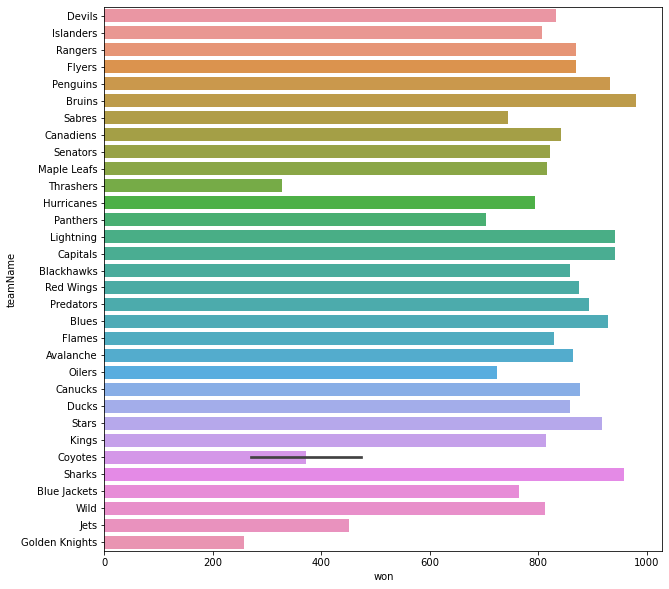

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='won',y='teamName',data=q)